First Common Ancestor: Design an algorithm and write code to find the first common ancestor
of two nodes in a binary tree. Avoid storing additional nodes in a data structure. NOTE: This is not
necessarily a binary search tree.

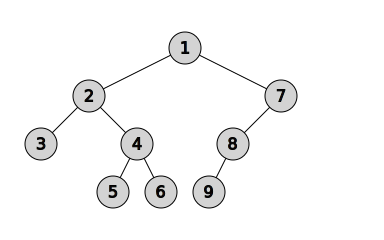

(Node(3), Node(6))

In [4]:
from binarytree import Node as N

nodes = {i: N(i) for i in range(1, 10)}

root = nodes[1]
root.parent = None
root.left = nodes[2]
root.right = nodes[7]
root.right.left = nodes[8]
root.right.left.left = nodes[9]
root.left.left = n1 = nodes[3]
root.left.right = nodes[4]
root.left.right.left = nodes[5]
root.left.right.right = n2 = nodes[6]

for root in nodes.values():
    for n in [root.left, root.right]:
        if n is not None:
            n.parent = root

display(root)

n1, n2

## Gayle's Solution #1 -- With links to parents, Trace paths up until they cross

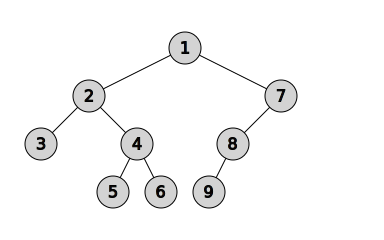

We want the MRCA of 3 and 6
The node 2 seems to be the MRCA


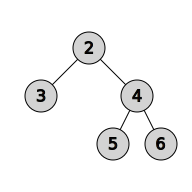

In [23]:
class NotBinaryTreeException(Exception):
    pass


def calc_depth(node: N) -> int:
    depth = 0
    while node.parent is not None:
        node = node.parent
        depth += 1
    return depth


def go_up_n_levels(node: N, n: int) -> N:
    for _ in range(n):
        node = node.parent
    return node


def go_up_1_level(node: N) -> N:
    return go_up_n_levels(node, 1)


# O(d) where d is the depth of the deeper node
def find_most_recent_common_ancestor(n1: N, n2: N) -> N:
    delta = calc_depth(n1) - calc_depth(n2)

    first = n1 if delta > 0 else n2
    second = n2 if delta > 0 else n1
    first = go_up_n_levels(first.parent, delta)

    while first is not second and first is not None and second is not None:
        first = go_up_1_level(first)
        second = go_up_1_level(second)

    if first is None or second is None:
        raise NotBinaryTreeException

    return first


display(root)
print(f"We want the MRCA of {n1.value} and {n2.value}")
mrca = find_most_recent_common_ancestor(n1, n2)
print(f"The node {mrca.value} seems to be the MRCA")
mrca

## Solution 2 : trace parents and subtrees of siblings

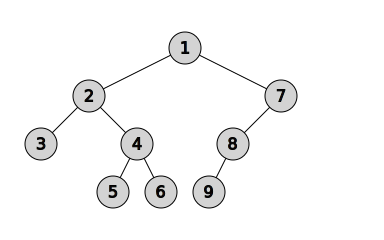

In [29]:
root

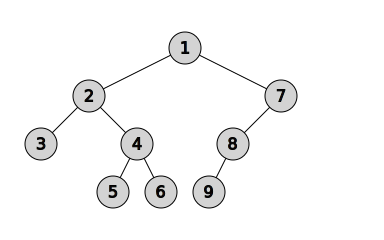

=> The MRCA is 8


In [75]:
from collections import deque
from typing import Optional


class NodesInDifferentTreesException(Exception):
    pass


def detect_node(node_to_find: N, under: N) -> bool:
    # TODO: Add docstring
    to_visit = deque([under])
    while to_visit:
        node = to_visit.popleft()
        if node is node_to_find:
            return True
        if node.left:
            to_visit.append(node.left)
        if node.right:
            to_visit.append(node.right)
    return False


def get_sibling(node: N) -> Optional[N]:
    # TODO: Add docstring
    p = node.parent
    if p.left not in [node, None]:
        return p.left
    elif p.right not in [node, None]:
        return p.right
    return None


def find_most_recent_common_ancestor(n1: N, n2: N) -> N:
    # TODO: Add docstring
    if detect_node(n1, under=n2): 
        return n2
    elif detect_node(n2, under=n1):
        return n1
    
    node, node_to_find = n1, n2
    while node.parent:
        sibling = get_sibling(node)
        print(f"{sibling = }", end=" | ")
        if detect_node(node_to_find, under=sibling):
            return node.parent
        node = node.parent

    raise NodesInDifferentTreesException


display(root)
n1, n2 = nodes[8], nodes[8]
mrca = find_most_recent_common_ancestor(n1, n2)
print(f"=> The MRCA is {mrca.value}")

## Without links to parents

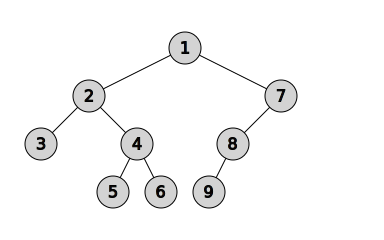

Find the MRCA of 2 and 3
Analyzing subtrees under 1
2 found under 2
3 found under 2
Both nodes are under the same subtree, going deeper.
--
Analyzing subtrees under 2
Node 2 is the root of this subtree
=> The MRCA is 2


In [100]:
class NodeNotFoundException(Exception):
    pass


def find_most_recent_common_ancestor(root: N, n1: N, n2: N) -> N:
    # TODO: Add a docstring
    if n1 is n2:
        return n1
    
    n1_is_the_root = n2_is_the_root = False
    while root:
        if n1 is root:
            n1_is_the_root = True
        elif root.right and detect_node(n1, under=root.right):
            n1_subtree = root.right
        elif root.left and detect_node(n1, under=root.left):
            n1_subtree = root.left
        else:
            raise NodeNotFoundException(f"I can't find node {n1.value}")

        if n2 is root:
            n2_is_the_root = True
        elif root.right and detect_node(n2, under=root.right):
            n2_subtree = root.right
        elif root.left and detect_node(n2, under=root.left):
            n2_subtree = root.left
        else:
            raise NodeNotFoundException(f"I can't find node {n2.value}")
        
        one_is_the_ancestor_of_the_other = n1_is_the_root or n2_is_the_root
        they_are_on_different_subtrees = n1_subtree is not n2_subtree

        if one_is_the_ancestor_of_the_other or they_are_on_different_subtrees:
            return root
        
        # If they are in the same subtree, get in there
        root = n1_subtree


display(root)
root = nodes[1]
n1, n2 = nodes[2], nodes[3]
mrca = find_most_recent_common_ancestor(root, n1, n2)
print(f"=> The MRCA is {mrca.value}")

In [ ]:
# Do a left-to-right traversal, i.e. an in order traversal
# Intuition: the first node that has A in the left subtree and B in
# the right subtree is the FCA -- the subtrees include the node itself
# Whenever you hit one of A or B, you bubble UP that finding (never down)

def in_order_traversal(node: N):
    if node.left:
        in_order_traversal(node.left)
    node   ## What
    if node.right:
        in_order_traversal(node.right)